In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from ising import create_lattice, monte_carlo_metropolis
import matplotlib
from matplotlib import pyplot as plt

# Phase transition analysis

In this notebook, we will run the Monte-Carlo simulation and find the phase transition of the 2D Ising model. We will start with no external field $h = 0$ and varying the inverse temperature $\beta$.

In [3]:
def plot_lattice(lattice):
    cmap = matplotlib.colors.ListedColormap(["blue", "red"])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    ax.imshow(lattice, cmap=cmap, vmin=-1, vmax=1)


def plot_lattice_init_end(output):
    cmap = matplotlib.colors.ListedColormap(["blue", "red"])
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    axs[0].imshow(output["lattice_init"], cmap=cmap, vmin=-1, vmax=1)
    axs[1].imshow(output["lattice"], cmap=cmap, vmin=-1, vmax=1)


def plot_observable(output, key, y_label=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
    ax.plot(output["time"], output[key])
    ax.set_xlabel("Monte-Carlo steps")
    if y_label is not None:
        ax.set_ylabel(y_label)

Let us start with large temperature configurations. We know the critical value of the Ising model in 2D.

In [4]:
# Critical value
betac = 0.441

We see that when we vary $\beta$ across the transition temperature, we go from a disordered to an ordered phase.

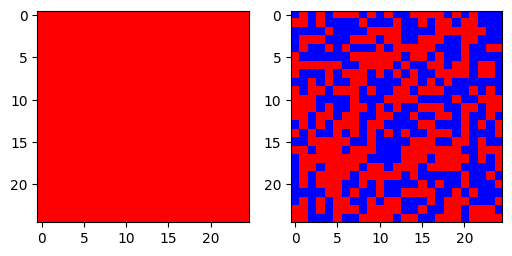

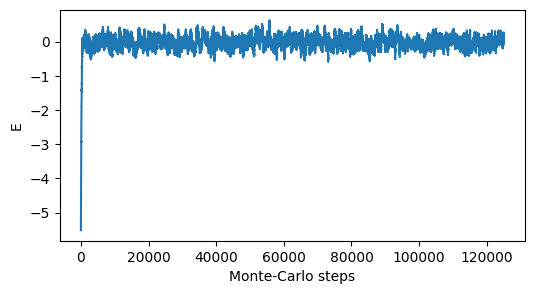

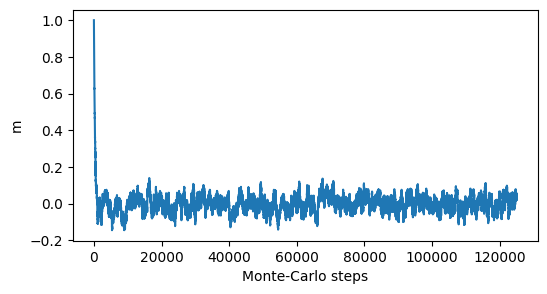

In [5]:
output = monte_carlo_metropolis(
    n=25,
    beta=0.01 * betac,
    h=0.0,
    max_steps=200,
    initial_state=1,
)
plot_lattice_init_end(output)
plot_observable(output, "benergies", y_label="E")
plot_observable(output, "magnetizations", y_label="m")

As we approach the critical temperature, we start seeing effects of the transition

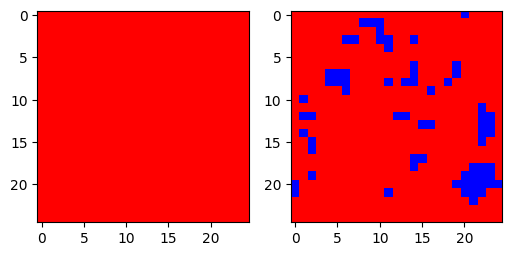

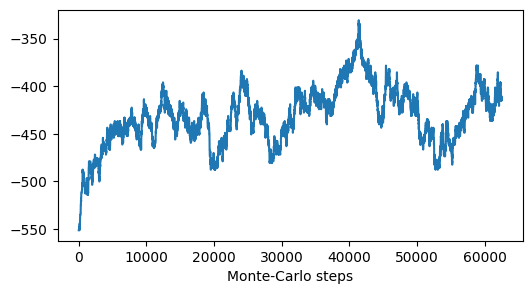

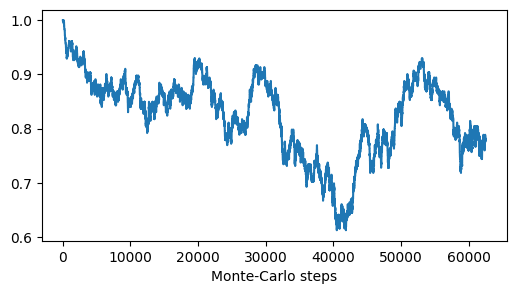

In [6]:
output = monte_carlo_metropolis(n=25, beta=1.0 * betac, h=0.0, max_steps=100, initial_state=1)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

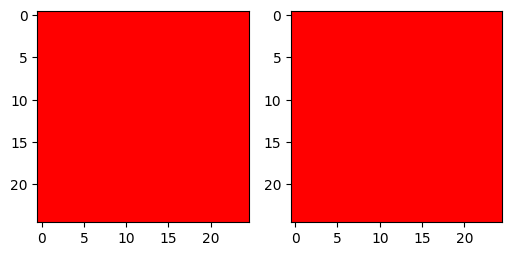

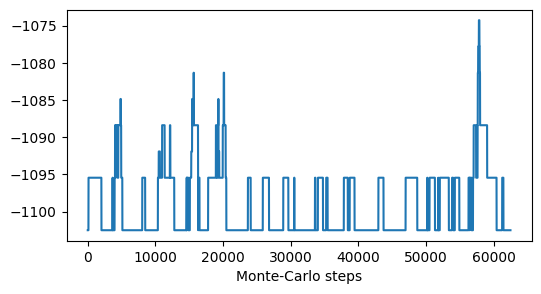

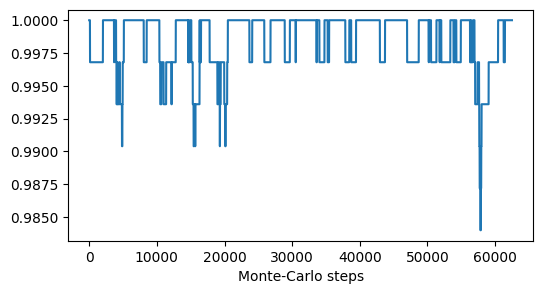

In [7]:
output = monte_carlo_metropolis(n=25, beta=2.0 * betac, h=0.0, max_steps=100, initial_state=1)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

## Hot initial state

Now let's see if we can check thoroughly the transition from the observables. We start by varying temperature while starting from a hot state.

Text(0, 0.5, '$|m|$')

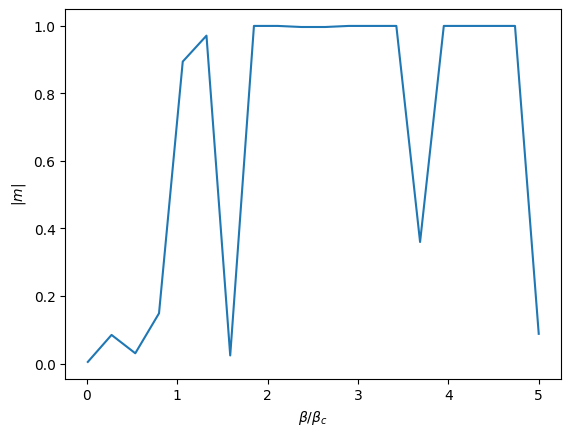

In [18]:
betas = betac * np.linspace(0.01, 5.0, num=20)
outputs_hot = [monte_carlo_metropolis(n=25, beta=beta, h=0.0, max_steps=200, initial_state=0) for beta in betas]

mags_hot = [np.abs(output["magnetizations"][-1]) for output in outputs_hot]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(betas / betac, mags_hot)
ax.set_xlabel(r"$\beta/\beta_c$")
ax.set_ylabel(r"$|m|$")

Interestingly the transition is not obvious from this state. What happens there? We see by plotting some lower temperature data point thatthe number of steps does not seem enough to pick an ordered phase.

5.0


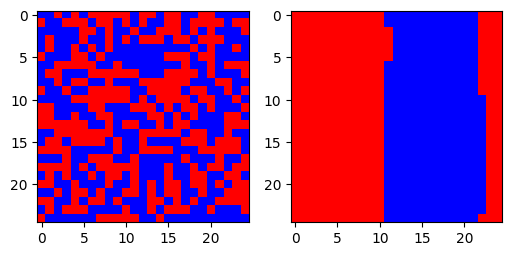

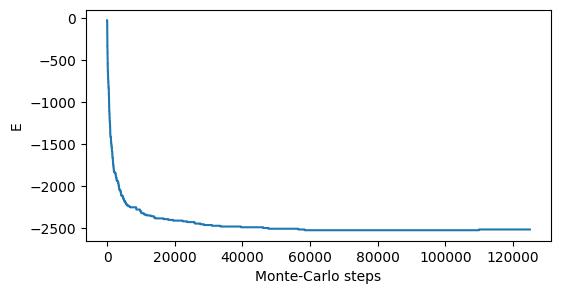

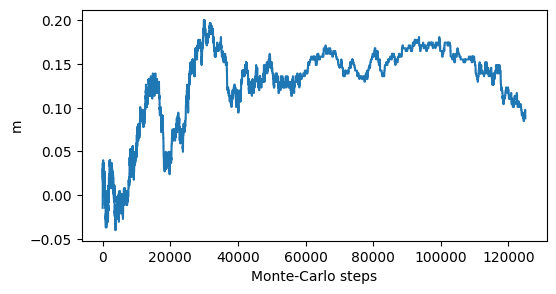

In [19]:
val_choice = -1
print(outputs_hot[val_choice]["beta"] / betac)
plot_lattice_init_end(outputs_hot[val_choice])
plot_observable(outputs_hot[val_choice], "benergies", y_label="E")
plot_observable(outputs_hot[val_choice], "magnetizations", y_label="m")

What if we help it with a tiny magnetic field?

Text(0, 0.5, '$|m|$')

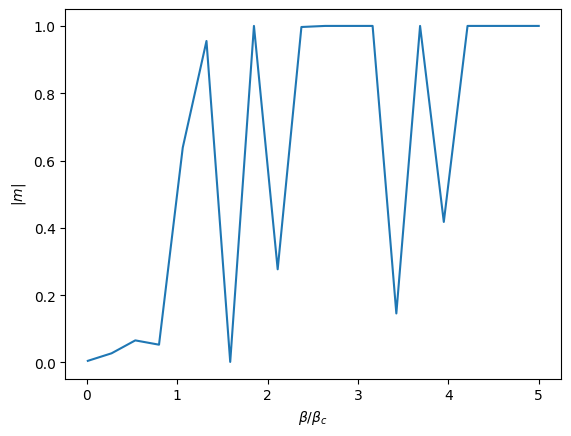

In [20]:
betas = betac * np.linspace(0.01, 5.0, num=20)
outputs_hot_smallh = [
    monte_carlo_metropolis(n=25, beta=beta, h=0.01, max_steps=200, initial_state=0) for beta in betas
]

mags_hot_smallh = [np.abs(output["magnetizations"][-1]) for output in outputs_hot_smallh]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(betas / betac, mags_hot_smallh)
ax.set_xlabel(r"$\beta/\beta_c$")
ax.set_ylabel(r"$|m|$")

It's better but for some reason the domain walls remain. Let us try to increase the number of steps?

Text(0, 0.5, '$|m|$')

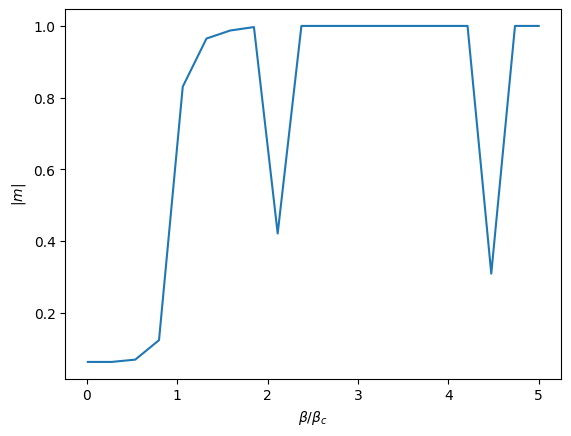

In [21]:
betas = betac * np.linspace(0.01, 5.0, num=20)
outputs_hot_larger_steps = [
    monte_carlo_metropolis(n=25, beta=beta, h=0.0, max_steps=1000, initial_state=0) for beta in betas
]

mags_hot_larger_steps = [np.abs(output["magnetizations"][-1]) for output in outputs_hot_larger_steps]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(betas / betac, mags_hot_larger_steps)
ax.set_xlabel(r"$\beta/\beta_c$")
ax.set_ylabel(r"$|m|$")

This is much better but somehow still domain wall issues.

## Cold initial state

We now do the same but starting from a cold state (all spins up).

Text(0, 0.5, '$m$')

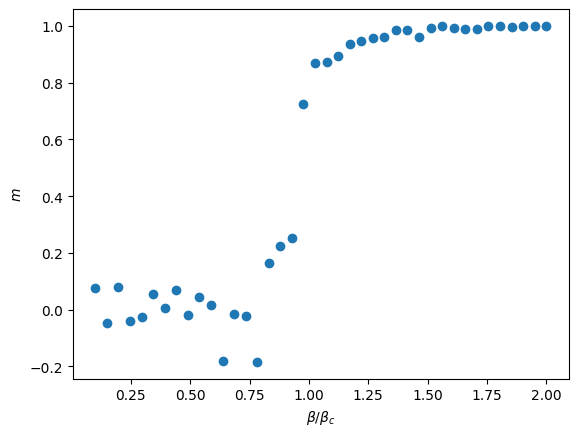

In [13]:
betas = betac * np.linspace(0.1, 2.0, num=40)
outputs_cold = [monte_carlo_metropolis(n=25, beta=beta, h=0.0, max_steps=200, initial_state=1) for beta in betas]

mags_cold = [output["magnetizations"][-1] for output in outputs_cold]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas / betac, mags_cold)
ax.set_xlabel(r"$\beta/\beta_c$")
ax.set_ylabel(r"$m$")

Here we see the transition at the right temperature, however the disordered phase is quite noisy. Can we do something about this? First let's try to use the correct initial state on each side of the transition.

In [14]:
betas_above = betac * np.linspace(1.05, 2.0, num=20)
outputs_cold_above = [
    monte_carlo_metropolis(n=25, beta=beta, h=0.0, max_steps=200, initial_state=1) for beta in betas_above
]

betas_below = betac * np.linspace(0.05, stop=0.95, num=20)
outputs_cold_below = [
    monte_carlo_metropolis(n=25, beta=beta, h=0.0, max_steps=200, initial_state=0) for beta in betas_below
]

Text(0, 0.5, '$m$')

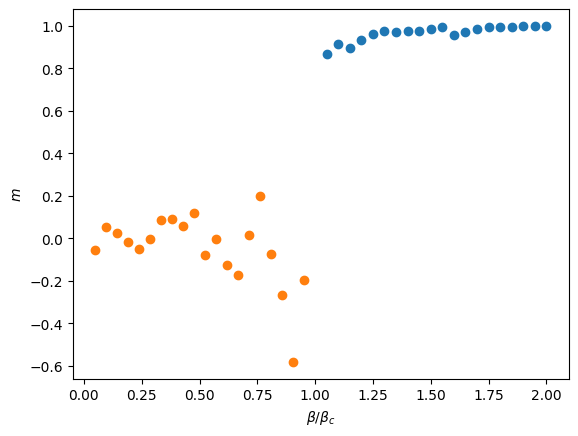

In [15]:
mags_cold_above = [output["magnetizations"][-1] for output in outputs_cold_above]
mags_cold_below = [output["magnetizations"][-1] for output in outputs_cold_below]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas_above / betac, mags_cold_above)
ax.scatter(betas_below / betac, mags_cold_below)
ax.set_xlabel(r"$\beta/\beta_c$")
ax.set_ylabel(r"$m$")

This is still noisy, let us check the effect of system size!

In [16]:
outputs_cold_larger_size = [
    monte_carlo_metropolis(n=60, beta=beta, h=0.0, max_steps=200, initial_state=1) for beta in betas
]

Text(0, 0.5, '$m$')

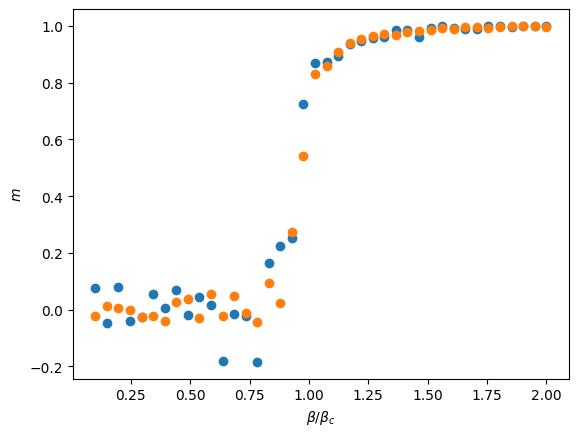

In [17]:
mags_cold_larger_size = [output["magnetizations"][-1] for output in outputs_cold_larger_size]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas / betac, mags_cold)
ax.scatter(betas / betac, mags_cold_larger_size)
ax.set_xlabel(r"$\beta/\beta_c$")
ax.set_ylabel(r"$m$")

We see it is quite better, the noise seems to have reduced.